In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

from utils.data_preparation import naive_bayes_preprocessing, bert_preprocessing,electra_preprocessing
from models.naive_bayes import NaiveBayes
from models.bert import Bert,DistilBert
from models.gpt2_roberta_electra import Electra

In [2]:
emotion_labels = ['admiration', 'amusement', 'anger', 'annoyance', 'approval',
       'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
       'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise',
       'neutral']


In [3]:
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

In [10]:
from utils.data_preparation import goemotions_preprocessing
from models.goemotions_model import GoEmotionsBert  
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report

# Prepare data
data, tokenizer = goemotions_preprocessing()
input_ids_train, attention_mask_train, y_train = data['train']
input_ids_test, attention_mask_test, y_test = data['test']

train_dataset = TensorDataset(input_ids_train, attention_mask_train, y_train)
test_dataset = TensorDataset(input_ids_test, attention_mask_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Train and evaluate
model = GoEmotionsBert()
model.fit(train_loader, epochs=20)

y_pred = model.predict(test_loader)

# Convert back to NumPy for evaluation
y_pred_np = y_pred.numpy()
y_true_np = y_test.numpy()

print(classification_report(y_true_np, y_pred_np, digits=4, zero_division=0))


Training Epoch 1: 100%|█████████████████████| 1357/1357 [00:49<00:00, 27.16it/s]


Epoch 1 Loss: 0.1053


Training Epoch 2: 100%|█████████████████████| 1357/1357 [00:50<00:00, 27.11it/s]


Epoch 2 Loss: 0.0596


Training Epoch 3: 100%|█████████████████████| 1357/1357 [00:50<00:00, 27.12it/s]


Epoch 3 Loss: 0.0476


Training Epoch 4: 100%|█████████████████████| 1357/1357 [00:49<00:00, 27.28it/s]


Epoch 4 Loss: 0.0389


Training Epoch 5: 100%|█████████████████████| 1357/1357 [00:49<00:00, 27.43it/s]


Epoch 5 Loss: 0.0324


Training Epoch 6: 100%|█████████████████████| 1357/1357 [00:49<00:00, 27.43it/s]


Epoch 6 Loss: 0.0272


Training Epoch 7: 100%|█████████████████████| 1357/1357 [00:49<00:00, 27.45it/s]


Epoch 7 Loss: 0.0228


Training Epoch 8: 100%|█████████████████████| 1357/1357 [00:49<00:00, 27.45it/s]


Epoch 8 Loss: 0.0194


Training Epoch 9: 100%|█████████████████████| 1357/1357 [00:49<00:00, 27.44it/s]


Epoch 9 Loss: 0.0167


Training Epoch 10: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.43it/s]


Epoch 10 Loss: 0.0142


Training Epoch 11: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.43it/s]


Epoch 11 Loss: 0.0124


Training Epoch 12: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.43it/s]


Epoch 12 Loss: 0.0108


Training Epoch 13: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.43it/s]


Epoch 13 Loss: 0.0091


Training Epoch 14: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.45it/s]


Epoch 14 Loss: 0.0080


Training Epoch 15: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.46it/s]


Epoch 15 Loss: 0.0072


Training Epoch 16: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.46it/s]


Epoch 16 Loss: 0.0063


Training Epoch 17: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.43it/s]


Epoch 17 Loss: 0.0056


Training Epoch 18: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.43it/s]


Epoch 18 Loss: 0.0051


Training Epoch 19: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.44it/s]


Epoch 19 Loss: 0.0046


Training Epoch 20: 100%|████████████████████| 1357/1357 [00:49<00:00, 27.35it/s]


Epoch 20 Loss: 0.0043
              precision    recall  f1-score   support

           0     0.6631    0.7341    0.6968       504
           1     0.7733    0.8788    0.8227       264
           2     0.5405    0.5051    0.5222       198
           3     0.3194    0.3594    0.3382       320
           4     0.3616    0.3761    0.3687       351
           5     0.4191    0.4222    0.4207       135
           6     0.3869    0.5033    0.4375       153
           7     0.4697    0.5458    0.5049       284
           8     0.5143    0.4337    0.4706        83
           9     0.3525    0.2848    0.3150       151
          10     0.3986    0.4419    0.4192       267
          11     0.5310    0.4878    0.5085       123
          12     0.4643    0.3514    0.4000        37
          13     0.4688    0.4369    0.4523       103
          14     0.5889    0.6795    0.6310        78
          15     0.9003    0.8977    0.8990       352
          16     1.0000    0.1667    0.2857         6
     

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

def plot_multilabel_confusion_matrix(y_true, y_pred, label_names):
    conf_matrices = multilabel_confusion_matrix(y_true, y_pred)

    fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(22, 12))
    axes = axes.flatten()

    for i, (cm, label) in enumerate(zip(conf_matrices, label_names)):
        sns.heatmap(cm, annot=True, fmt='d', cbar=False, ax=axes[i])
        axes[i].set_title(label)
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
        axes[i].xaxis.set_ticklabels(['0', '1'])
        axes[i].yaxis.set_ticklabels(['0', '1'])

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle('Per-Label Confusion Matrices', fontsize=18, y=1.02)
    plt.show()


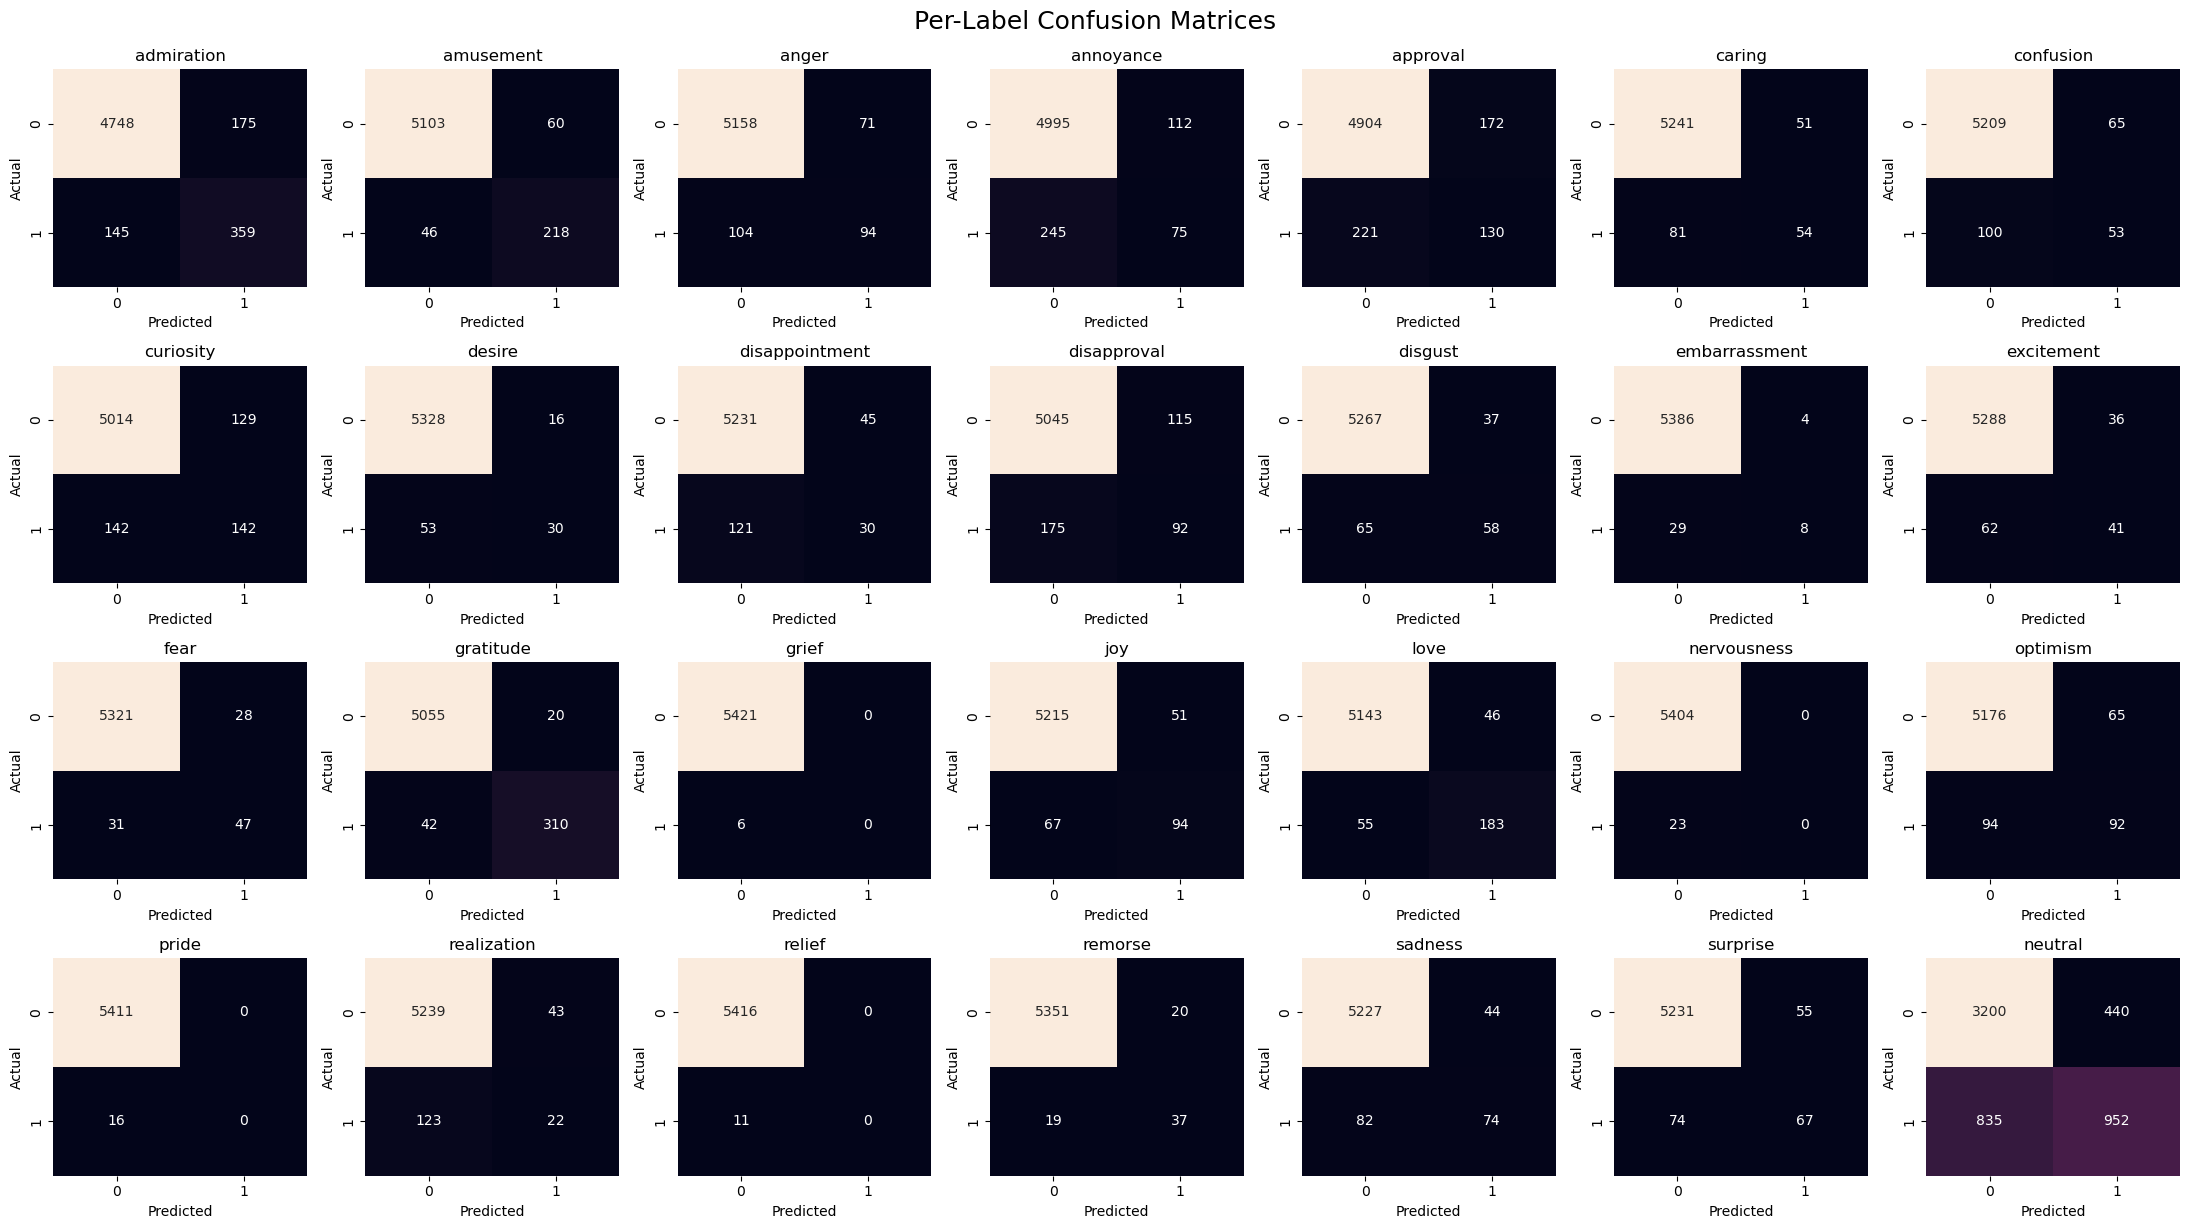

In [8]:
labels_dict = {
    0: "admiration", 1: "amusement", 2: "anger", 3: "annoyance", 4: "approval",
    5: "caring", 6: "confusion", 7: "curiosity", 8: "desire", 9: "disappointment",
    10: "disapproval", 11: "disgust", 12: "embarrassment", 13: "excitement", 14: "fear",
    15: "gratitude", 16: "grief", 17: "joy", 18: "love", 19: "nervousness",
    20: "optimism", 21: "pride", 22: "realization", 23: "relief", 24: "remorse",
    25: "sadness", 26: "surprise", 27: "neutral"
}

plot_multilabel_confusion_matrix(y_true_np, y_pred_np, label_names=list(labels_dict.values()))
